## STopover_cosmx sample code (CosMx SMI)

### Load STopover & Prepare

In [2]:
import os
import pandas as pd
import numpy as np
import scanpy as sc

In [3]:
from STopover import STopover_imageST

### Download CosMx SMI dataset (Lung 5-1: Data Files)

#### https://nanostring.com/resources/smi-ffpe-dataset-lung5-rep1-data/

#### https://nanostring-public-share.s3.us-west-2.amazonaws.com/SMI-Compressed/SMI-ReadMe.html

##### Read single-cell dataset (GSE131907) with cell type annotation in .obs as 'Cell_subtype'

##### Cells with 'Sample_Origin = tLung' were subsetted for analysis

In [4]:
sc_adata = sc.read_h5ad('./data/sc_lung_cancer.h5ad')

In [5]:
sc_adata = sc_adata[sc_adata.obs['Sample_Origin']=='tLung']

In [6]:
sc_adata

View of AnnData object with n_obs × n_vars = 45149 × 29634
    obs: 'Barcode', 'Sample', 'Sample_Origin', 'Cell_type', 'Cell_type.refined', 'Cell_subtype'

##### Reassign Undetermined and NaN in 'Cell_subtype' into _ns subtype

In [7]:
sc_adata.obs['Cell_subtype'] = sc_adata.obs['Cell_subtype'].astype(object)
sc_adata.obs['Cell_type'] = sc_adata.obs['Cell_type'].astype(object)

sc_adata.obs['Cell_subtype'] = sc_adata.obs['Cell_subtype'].where(sc_adata.obs['Cell_subtype'].ne('Undetermined'), sc_adata.obs['Cell_type']+'_ns')
sc_adata.obs['Cell_subtype'] = sc_adata.obs['Cell_subtype'].fillna(sc_adata.obs['Cell_type']+'_ns')

In [8]:
sc_adata.obs

,Barcode,Sample,Sample_Origin,Cell_type,Cell_type.refined,Cell_subtype
AAACCTGAGACGACGT_LUNG_T09,AAACCTGAGACGACGT,LUNG_T09,tLung,Myeloid cells,Myeloid cells,CD1c+ DCs
AAACCTGAGACGACGT_LUNG_T34,AAACCTGAGACGACGT,LUNG_T34,tLung,B lymphocytes,B lymphocytes,Follicular B cells
AAACCTGAGACGCTTT_LUNG_T18,AAACCTGAGACGCTTT,LUNG_T18,tLung,Epithelial cells,Epithelial cells,tS2
AAACCTGAGACTGTAA_LUNG_T34,AAACCTGAGACTGTAA,LUNG_T34,tLung,Epithelial cells,Epithelial cells,tS2
AAACCTGAGATATGCA_LUNG_T25,AAACCTGAGATATGCA,LUNG_T25,tLung,T lymphocytes,T/NK cells,CD4+ Th
...,...,...,...,...,...,...
TTTGTCATCTCACATT_LUNG_T31,TTTGTCATCTCACATT,LUNG_T31,tLung,T lymphocytes,T/NK cells,CD8+/CD4+ Mixed Th
TTTGTCATCTGCGACG_LUNG_T31,TTTGTCATCTGCGACG,LUNG_T31,tLung,Fibroblasts,NaN,Fibroblasts_ns
TTTGTCATCTTGCCGT_LUNG_T30,TTTGTCATCTTGCCGT,LUNG_T30,tLung,Epithelial cells,Epithelial cells,tS1
TTTGTCATCTTTACAC_LUNG_T25,TTTGTCATCTTTACAC,LUNG_T25,tLung,B lymphocytes,B lymphocytes,Follicular B cells


### Create STopover_imageST object  
#### (annotate cells & convert to grid-based data)

#### Create directory to save file

In [4]:
save_dir = './results/CosMx_LUAD'
os.makedirs(save_dir, exist_ok=True)

In [ ]:
help(STopover_imageST)

In [6]:
data_path = './data/CosMx_LUAD/Lung5_Rep1-Flat_files_and_images'

In [12]:
sp_adata = STopover_imageST(sp_load_path=data_path, sc_adata=sc_adata, sc_celltype_colname = 'Cell_subtype', 
                            ST_type='cosmx', grid_method='transcript', annot_method='tacco', sc_norm_total=1e3,
                            tx_file_name = 'Lung5_Rep1_tx_file.csv', cell_exprmat_file_name='Lung5_Rep1_exprMat_file.csv', 
                            cell_metadata_file_name='Lung5_Rep1_metadata_file.csv', 
                            fov_colname = 'fov', cell_id_colname='cell_ID', tx_xcoord_colname='x_global_px', tx_ycoord_colname='y_global_px', transcript_colname='target',
                            meta_xcoord_colname='CenterX_global_px', meta_ycoord_colname='CenterY_global_px',
                            x_bins=100, y_bins=100, min_size=20, fwhm=2.5, thres_per=30, save_path=save_dir)

Anndata object is not provided: searching for the .h5ad file in 'sp_load_path'
Failed
Reading image-based ST data files in 'sp_load_path'
End of creating image-based ST cell-level anndata: 2.95 seconds
Using 'tacco' to annotate cells with reference single-cell data
____________________________________________________________
Starting preprocessing
Annotation profiles were not found in `reference.varm["Cell_subtype"]`. Constructing reference profiles with `tacco.preprocessing.construct_reference_profiles` and default arguments...
Finished preprocessing in 1.07 seconds.
Starting annotation of data with shape (99181, 947) and a reference of shape (45149, 947) using the following wrapped method:
+- platform normalization: platform_iterations=0, gene_keys=Cell_subtype, normalize_to=adata
   +- bisection boost: bisections=4, bisection_divisor=3
      +- core: method=OT annotation_prior=None
mean,std( rescaling(gene) )  227.9069765777833 4350.720377382078
bisection run on 1
bisection run on 0

In [13]:
sp_adata

STopover_imageST object with n_obs × n_vars = 9762 × 960
    obs: 'array_col', 'array_row', 'Activated DCs', 'Alveolar Mac', 'B lymphocytes_ns', 'CD141+ DCs', 'CD163+CD14+ DCs', 'CD1c+ DCs', 'CD207+CD1a+ LCs', 'CD4+ Th', 'CD8 low T', 'CD8+/CD4+ Mixed Th', 'COL13A1+ matrix FBs', 'COL14A1+ matrix FBs', 'Cytotoxic CD8+ T', 'EPCs', 'Endothelial cells_ns', 'Epithelial cells_ns', 'Exhausted CD8+ T', 'Exhausted Tfh', 'Fibroblasts_ns', 'Follicular B cells', 'GC B cells in the DZ', 'GC B cells in the LZ', 'Lymphatic ECs', 'MALT B cells', 'MAST', 'Mesothelial cells', 'Monocytes', 'Myeloid cells_ns', 'Myofibroblasts', 'NK', 'NK cells_ns', 'Naive CD4+ T', 'Naive CD8+ T', 'Pericytes', 'Plasma cells', 'Pleural Mac', 'Smooth muscle cells', 'Stalk-like ECs', 'T lymphocytes_ns', 'Tip-like ECs', 'Treg', 'Tumor ECs', 'mo-Mac', 'pDCs', 'tS1', 'tS2', 'tS3'
    uns: 'tx_by_cell_grid', 'adata_cell', 'x_bins', 'y_bins', 'ST_type', 'grid_method', 'sc_celltype_colname', 'transcript_colname', 'sc_norm_total', 'm

In [14]:
sp_adata.obs

,array_col,array_row,Activated DCs,Alveolar Mac,B lymphocytes_ns,CD141+ DCs,CD163+CD14+ DCs,CD1c+ DCs,CD207+CD1a+ LCs,CD4+ Th,...,Stalk-like ECs,T lymphocytes_ns,Tip-like ECs,Treg,Tumor ECs,mo-Mac,pDCs,tS1,tS2,tS3
0_0,0,0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.005000,...,0.000000,2.000000,0.945946,0.000000,0.000000,1.063433,0.0,0.000000,0.0,0.0
0_1,0,1,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,1.022397,...,0.000000,0.000000,0.000000,0.000000,1.394089,1.067164,0.0,0.948276,0.0,0.0
0_2,0,2,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.999448,...,2.631579,0.000000,0.000000,0.652174,0.605911,0.000000,0.0,0.051724,0.0,0.0
0_3,0,3,0.931034,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,1.368421,0.000000,0.000000,0.000000,1.000000,2.000000,0.0,0.000000,0.0,0.0
0_4,0,4,0.000000,0.000000,0.0,0.0,0.000000,0.680412,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99_95,99,95,0.000000,0.946108,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.815789,0.002257,0.050607,0.0,0.000000,0.0,0.0
99_96,99,96,0.000000,0.053892,0.0,0.0,0.174359,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.184211,3.997743,0.761394,0.0,0.000000,0.0,0.0
99_97,99,97,0.000000,0.000000,0.0,0.0,0.825641,0.000000,0.0,3.958963,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.139410,0.0,0.000000,0.0,0.0
99_98,99,98,0.000000,0.015723,0.0,0.0,0.000000,0.000000,0.0,7.398180,...,0.000000,0.390411,0.000000,1.493421,0.000000,0.000000,1.0,0.000000,0.0,0.0


### Visualize spatial cell annotation

#### Remove cell types that end with '_ns'

In [15]:
sp_adata_cell = sp_adata.uns['adata_cell']
sp_adata_cell_sub = sp_adata_cell[~sp_adata_cell.obs['Cell_subtype'].str.contains('_ns')]

In [16]:
sp_adata_cell_sub

STopover_imageST object with n_obs × n_vars = 91109 × 960
    obs: 'fov', 'cell_ID', 'array_col', 'array_row', 'n_counts', 'Cell_subtype'
    var: 'n_cells'
    uns: 'log1p', 'x_bins', 'y_bins', 'ST_type', 'grid_method', 'sc_celltype_colname', 'transcript_colname', 'sc_norm_total', 'min_counts', 'min_cells', 'min_size', 'fwhm', 'thres_per', 'obs_raw'

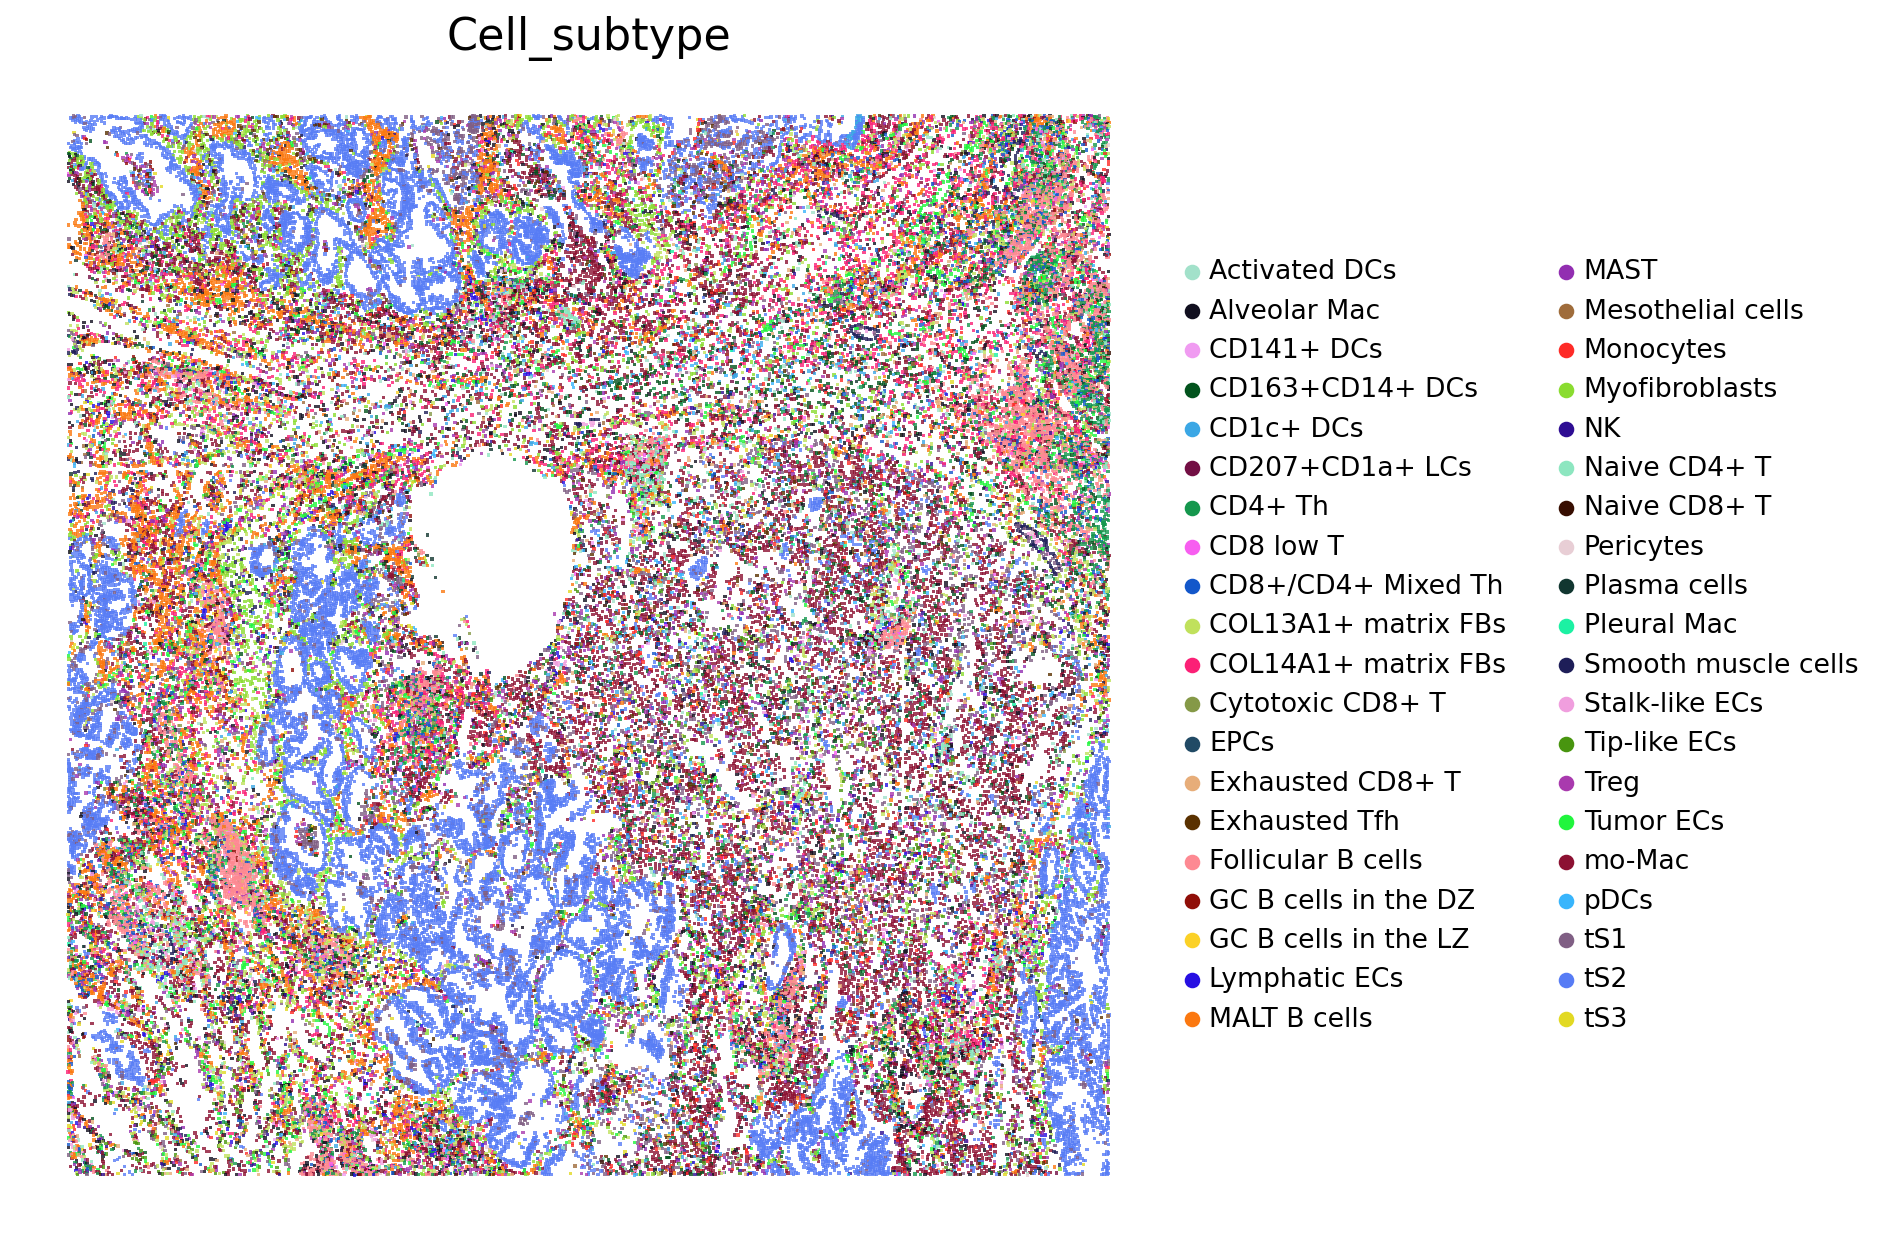

In [17]:
sp_adata_cell_sub.vis_spatial_imageST(feat_name='Cell_subtype', title_fontsize=20, dot_size=1.5,
                                      fig_size=(12,8), legend_fontsize=12, save=True, dpi=200)

### Topological similarity analysis

In [18]:
cell_subtypes_list = sp_adata.obs.columns[2:]
cell_subtypes_list

Index(['Activated DCs', 'Alveolar Mac', 'B lymphocytes_ns', 'CD141+ DCs',
       'CD163+CD14+ DCs', 'CD1c+ DCs', 'CD207+CD1a+ LCs', 'CD4+ Th',
       'CD8 low T', 'CD8+/CD4+ Mixed Th', 'COL13A1+ matrix FBs',
       'COL14A1+ matrix FBs', 'Cytotoxic CD8+ T', 'EPCs',
       'Endothelial cells_ns', 'Epithelial cells_ns', 'Exhausted CD8+ T',
       'Exhausted Tfh', 'Fibroblasts_ns', 'Follicular B cells',
       'GC B cells in the DZ', 'GC B cells in the LZ', 'Lymphatic ECs',
       'MALT B cells', 'MAST', 'Mesothelial cells', 'Monocytes',
       'Myeloid cells_ns', 'Myofibroblasts', 'NK', 'NK cells_ns',
       'Naive CD4+ T', 'Naive CD8+ T', 'Pericytes', 'Plasma cells',
       'Pleural Mac', 'Smooth muscle cells', 'Stalk-like ECs',
       'T lymphocytes_ns', 'Tip-like ECs', 'Treg', 'Tumor ECs', 'mo-Mac',
       'pDCs', 'tS1', 'tS2', 'tS3'],
      dtype='object')

#### 0. Create list of cell type pairs

In [19]:
cell_type_pairs = [(cell_subtypes_list[idx_i], cell_subtypes_list[idx_j]) \
                   for idx_i in range(len(cell_subtypes_list)) \
                   for idx_j in range(idx_i+1, len(cell_subtypes_list))]

#### 1. Extract colocalized regions between cell types

##### Extract colocalization patterns btw cell types

In [20]:
sp_adata.topological_similarity(feat_pairs=cell_type_pairs, jaccard_type='default', J_result_name='result')

End of data preparation
Elapsed time: 0.39 seconds 
Calculation of adjacency matrix and mask


  0%|          | 0/1 [00:00<?, ?it/s]

Calculation of connected components for each feature


  0%|          | 0/47 [00:00<?, ?it/s]

Calculation of composite jaccard indexes between feature pairs


  0%|          | 0/1081 [00:00<?, ?it/s]

End of the whole process: 48.06 seconds


##### Visualize spatial feature map

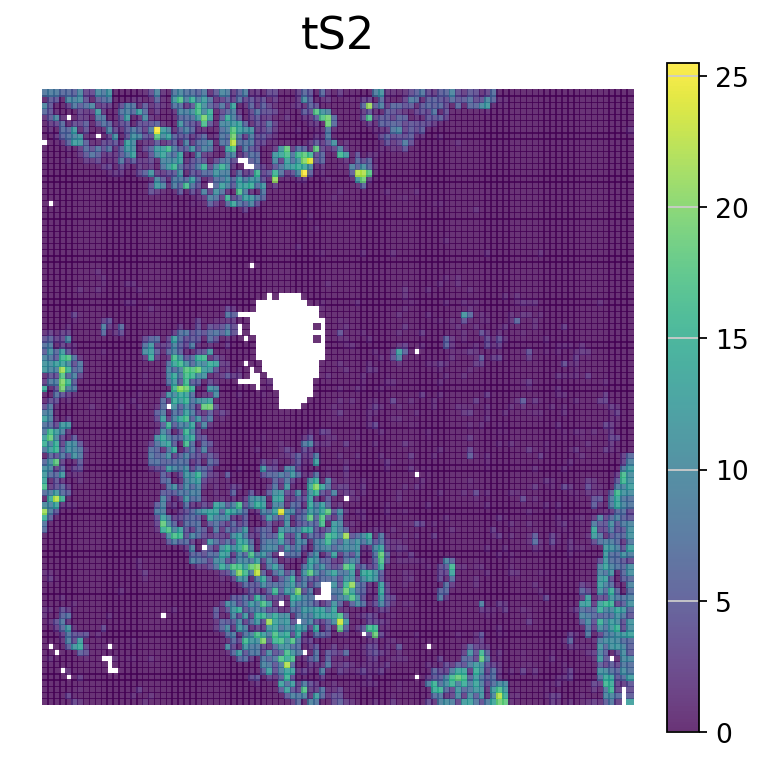

In [21]:
sp_adata.vis_spatial_imageST(feat_name='tS2', fig_size=(5,5), title_fontsize=20, 
                             legend_fontsize=12, save=True, return_axis=False, dpi=200)

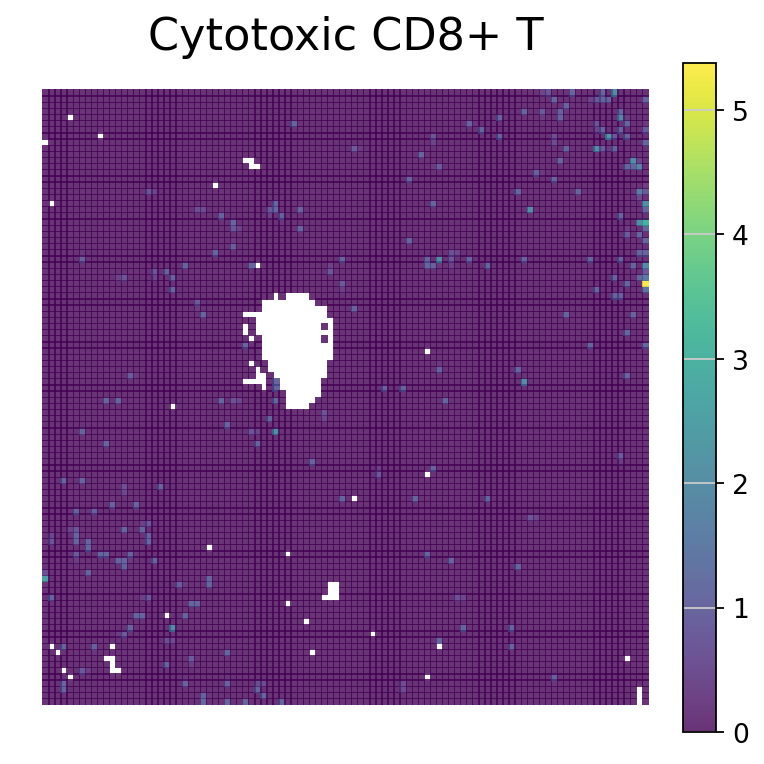

In [22]:
sp_adata.vis_spatial_imageST(feat_name='Cytotoxic CD8+ T', fig_size=(5,5), title_fontsize=20, 
                             legend_fontsize=12, save=True, return_axis=False,  dpi=200)

##### Visualize colocalized regions of a cell type pair

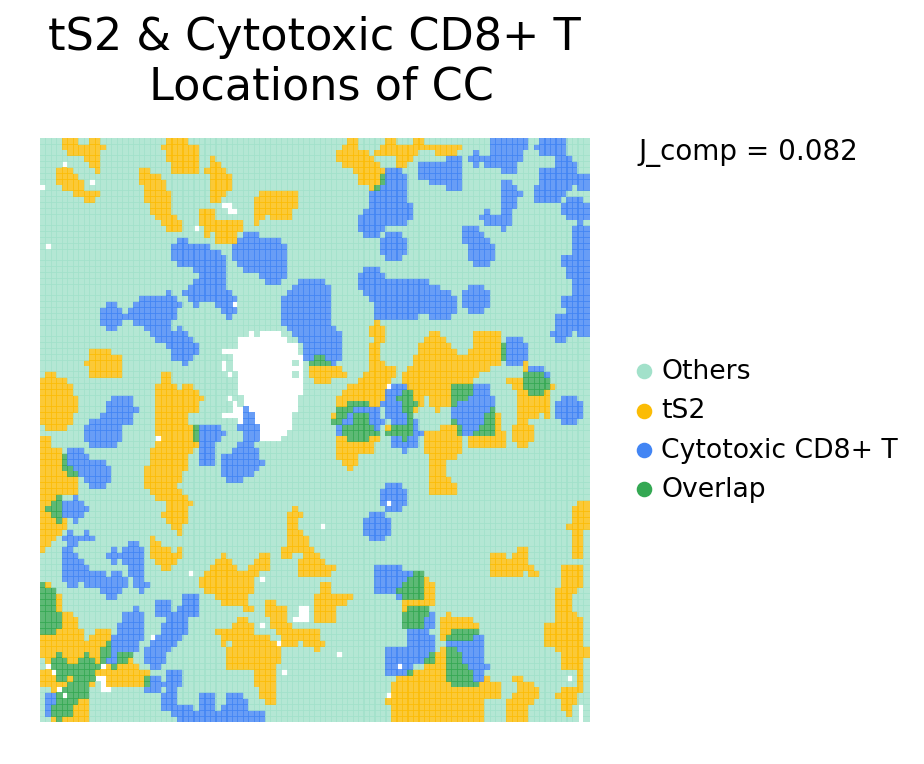

In [23]:
sp_adata.vis_all_connected(feat_name_x='tS2', feat_name_y='Cytotoxic CD8+ T',
                           alpha = 0.8, dot_size=3,
                           fig_size=(6,5), title_fontsize = 20, legend_fontsize = 12, 
                           title = '\n Locations of CC', return_axis=False, save=True, dpi=200)

##### Visualize top 8 regions with high local overlap

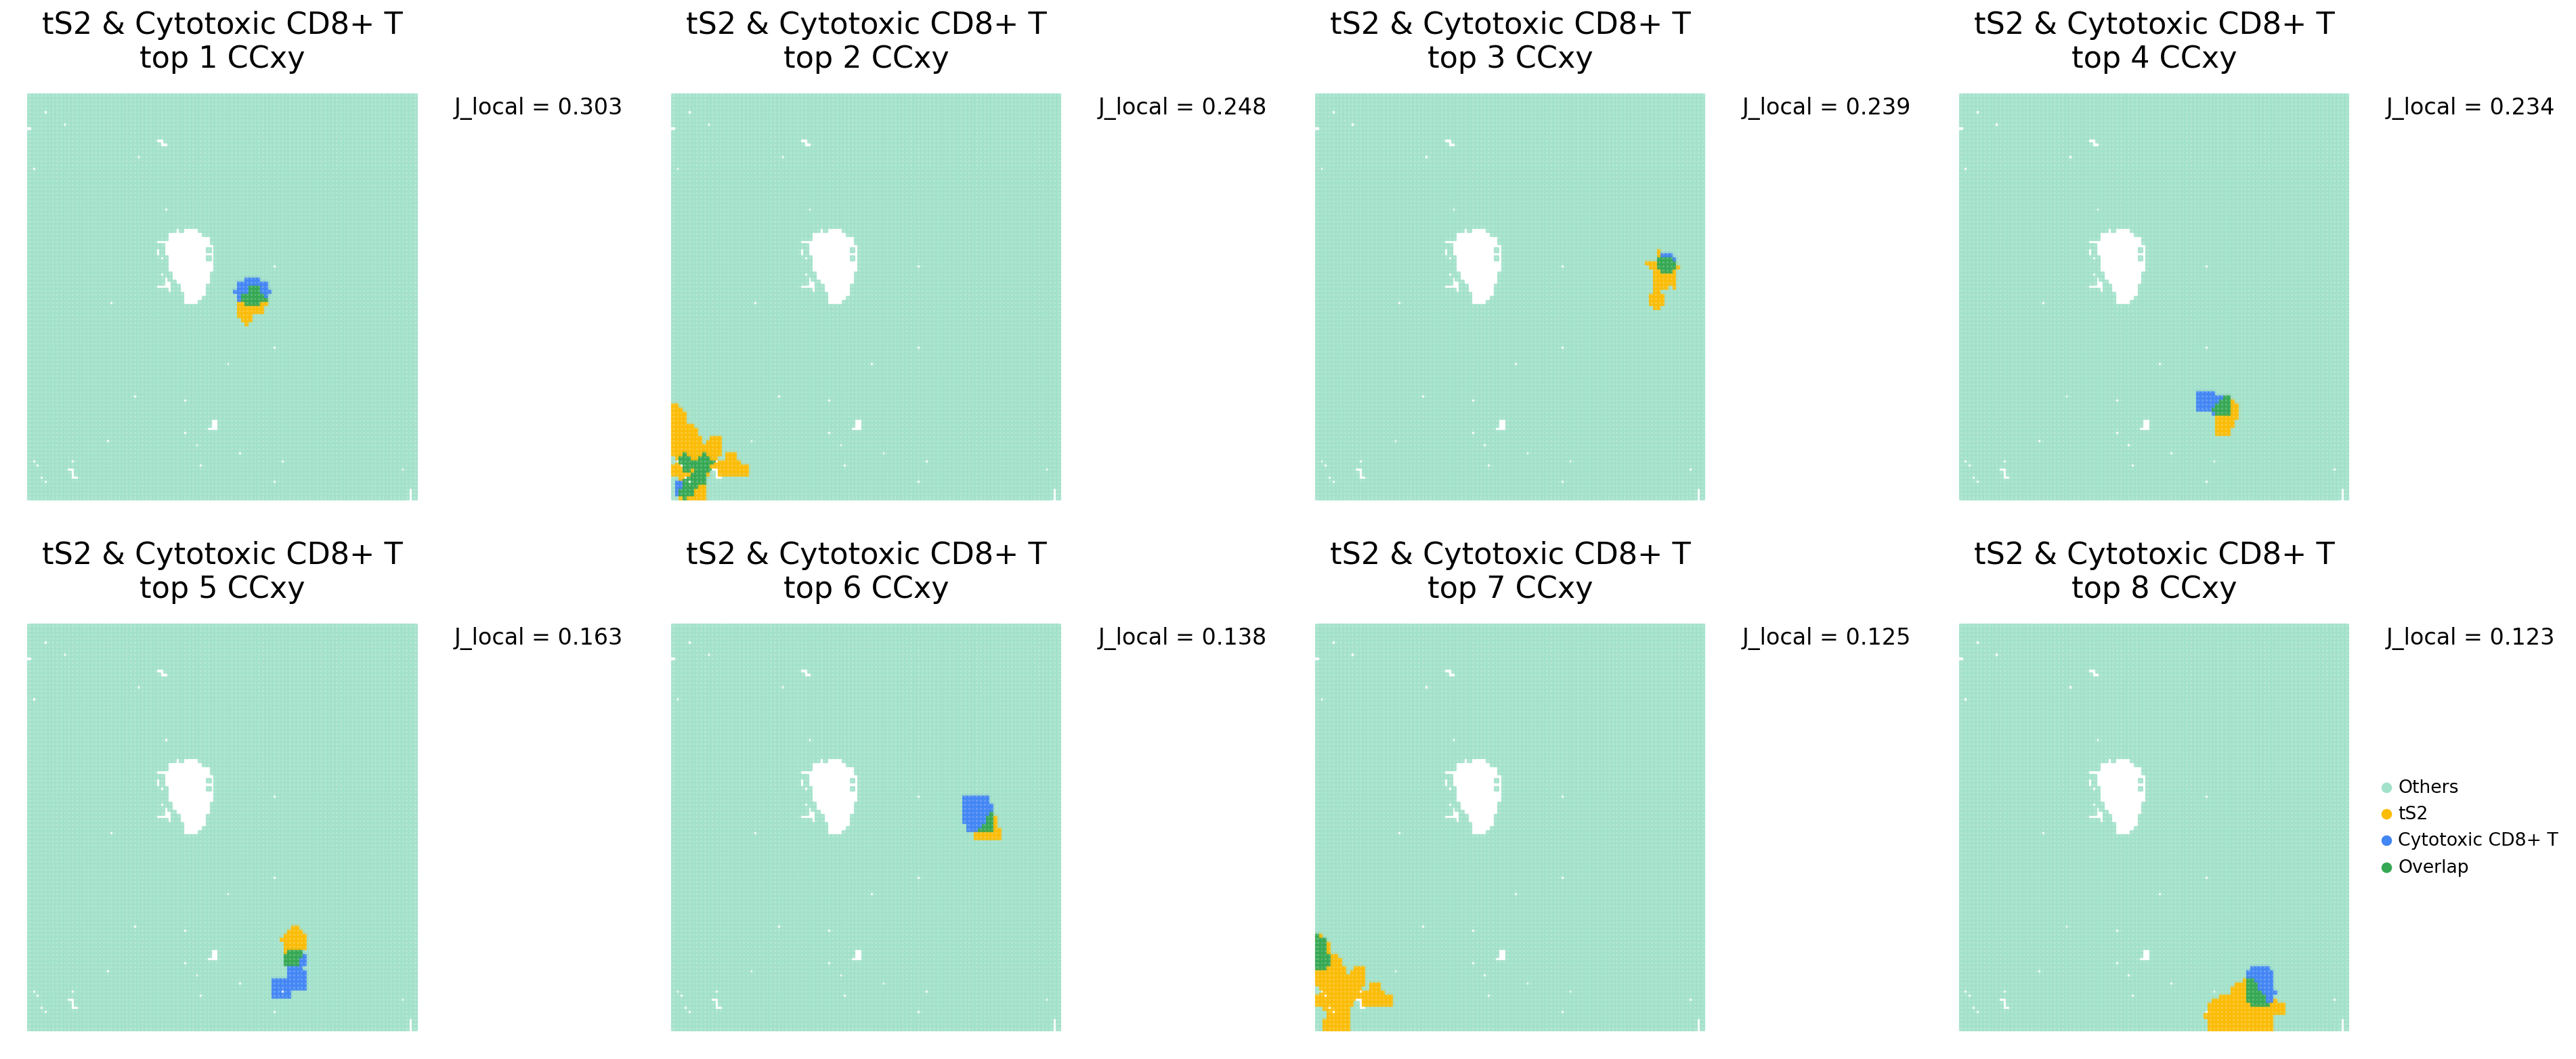

In [24]:
sp_adata.vis_jaccard_top_n_pair(feat_name_x='tS2', feat_name_y='Cytotoxic CD8+ T',
                                top_n = 8, ncol = 4, alpha = 0.8, dot_size=3,
                                fig_size = (6,5), title_fontsize = 20, legend_fontsize = 12,
                                title = '', return_axis=False, save=True, dpi=200)

##### Run permutation test

In [27]:
help(STopover_imageST.run_significance_test)

Help on function run_significance_test in module STopover.STopover_class:

run_significance_test(self, feat_pairs_sig_test=None, nperm=1000, seed=0, jaccard_type='default', num_workers=64, progress_bar=True)
    ## Perform a significant test using a permutation test and calculate p-values
    * feat_pairs_sig_test: feature pairs for the significance test (default: None -> Test all saved in .uns)
    * nperm: number of the random permutation (default: 1000)
    * seed: the seed for the random number generator (default: 0)
    * jaccard_type: type of the jaccard index output ('default': jaccard index or 'weighted': weighted jaccard index)
    * num_workers: number of workers to use for multiprocessing
    * progress_bar: whether to show the progress bar during multiprocessing



In [28]:
df_mod = sp_adata.uns['J_result_0']

In [29]:
df_sub = df_mod[((df_mod['Feat_1']=='tS2') & (df_mod['Feat_2'].isin(['CD1c+ DCs','Follicular B cells','Cytotoxic CD8+ T']))) | \
                ((df_mod['Feat_2']=='tS2') & (df_mod['Feat_1'].isin(['CD1c+ DCs','Follicular B cells','Cytotoxic CD8+ T'])))].reset_index(drop=True)
df_sub

,group,Feat_1,Feat_2,Avg_1,Avg_2,J_comp
0,0,CD1c+ DCs,tS2,0.145360,1.788875,0.078062
1,0,Cytotoxic CD8+ T,tS2,0.025302,1.788875,0.081704
2,0,Follicular B cells,tS2,0.510244,1.788875,0.042387


In [ ]:
sp_adata.run_significance_test(feat_pairs_sig_test = df_sub.loc[:,['Feat_1','Feat_2']],
                               nperm=1000, seed=1234, jaccard_type='default', progress_bar=True)

Run permutation test for the given LR pairs
End of data preparation
Elapsed time: 0.09 seconds 
Calculation of adjacency matrix for visium


  0%|          | 0/1 [00:00<?, ?it/s]

Calculation of connected components for each feature


  0%|          | 0/4000 [00:00<?, ?it/s]

##### Show significance of colocalization

In [ ]:
df_perm = sp_adata.uns['J_result_0_sig']
df_perm

##### Save STopover object
###### Cell annotation data in sp_adata.uns['adata_cell'] is saved separately

In [30]:
sp_adata.save_connected_loc_data(save_format='h5ad', filename = 'sp_grid_celltype_interact')

Saving anndata in .uns separately as .h5ad: adata_cell


#### 2. Extract colocalized regions btw LR pairs 
##### (CellTalk DB)

##### Extract colocalization patterns between LR pairs

In [31]:
sp_adata.topological_similarity(use_lr_db=True, lr_db_species='human', db_name='CellTalk',
                                jaccard_type='default', J_result_name='result')

Using CellTalk ligand-receptor dataset
End of data preparation
Elapsed time: 1.78 seconds 
Calculation of adjacency matrix and mask


  0%|          | 0/1 [00:00<?, ?it/s]

Calculation of connected components for each feature


  0%|          | 0/442 [00:00<?, ?it/s]

Calculation of composite jaccard indexes between feature pairs


  0%|          | 0/728 [00:00<?, ?it/s]

End of the whole process: 598.12 seconds


##### Save STopover object to the save_dir

In [32]:
sp_adata.save_connected_loc_data(save_format='h5ad', filename = 'sp_grid_lr_interact')

Saving anndata in .uns separately as .h5ad: adata_cell


##### Visualize feature map for LR pairs

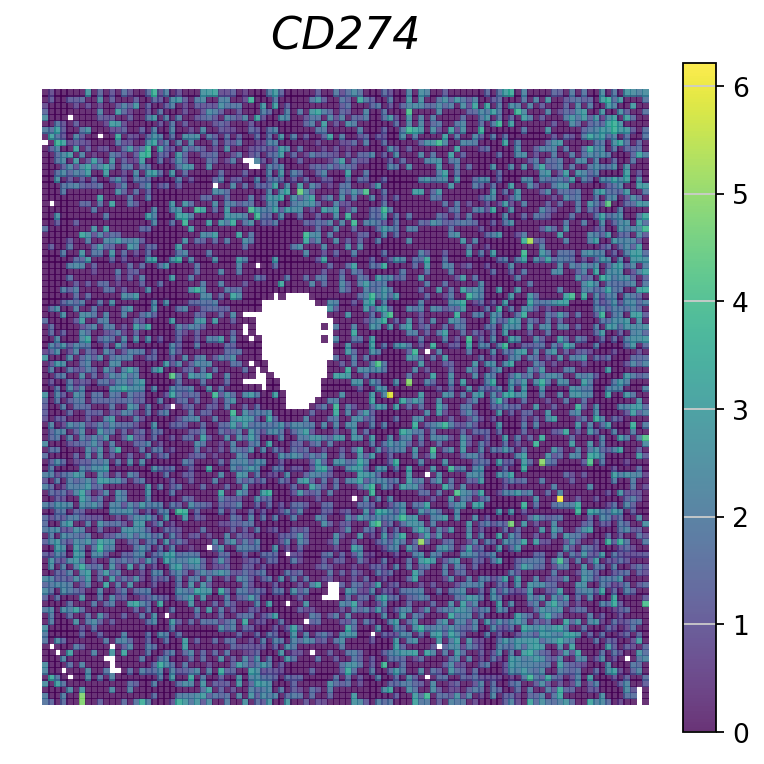

In [33]:
sp_adata.vis_spatial_imageST(feat_name='CD274', fig_size=(5,5), title_fontsize=20, 
                             legend_fontsize=12, save=True, return_axis=False,  dpi=200)

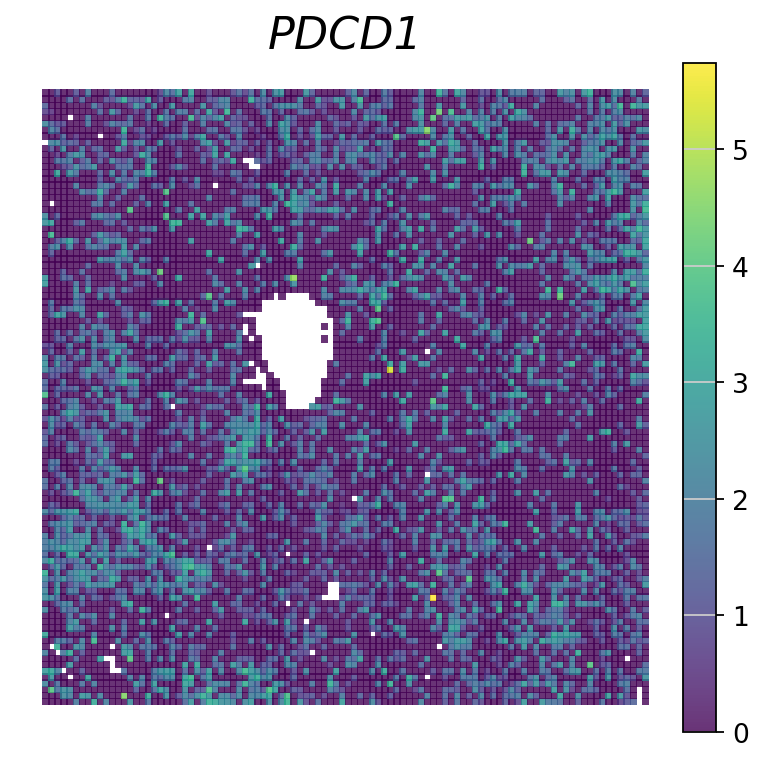

In [34]:
sp_adata.vis_spatial_imageST(feat_name='PDCD1', fig_size=(5,5), title_fontsize=20, 
                             legend_fontsize=12, save=True, return_axis=False,  dpi=200)

##### Visualize colocalized regions of LR

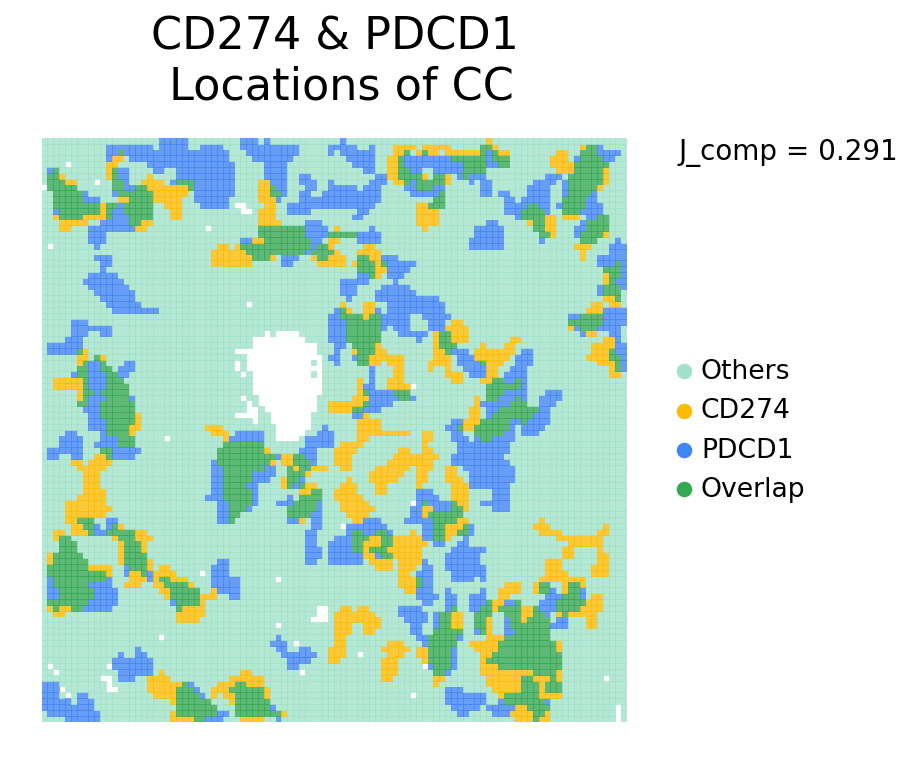

In [35]:
sp_adata.vis_all_connected(feat_name_x='CD274', feat_name_y='PDCD1',
                           alpha = 0.8, dot_size=3,
                           fig_size=(6,5), title_fontsize = 20, legend_fontsize = 12, 
                           title = '\n Locations of CC', return_axis=False, save=True, dpi=200)

##### Visualize top 8 regions with high local overlap

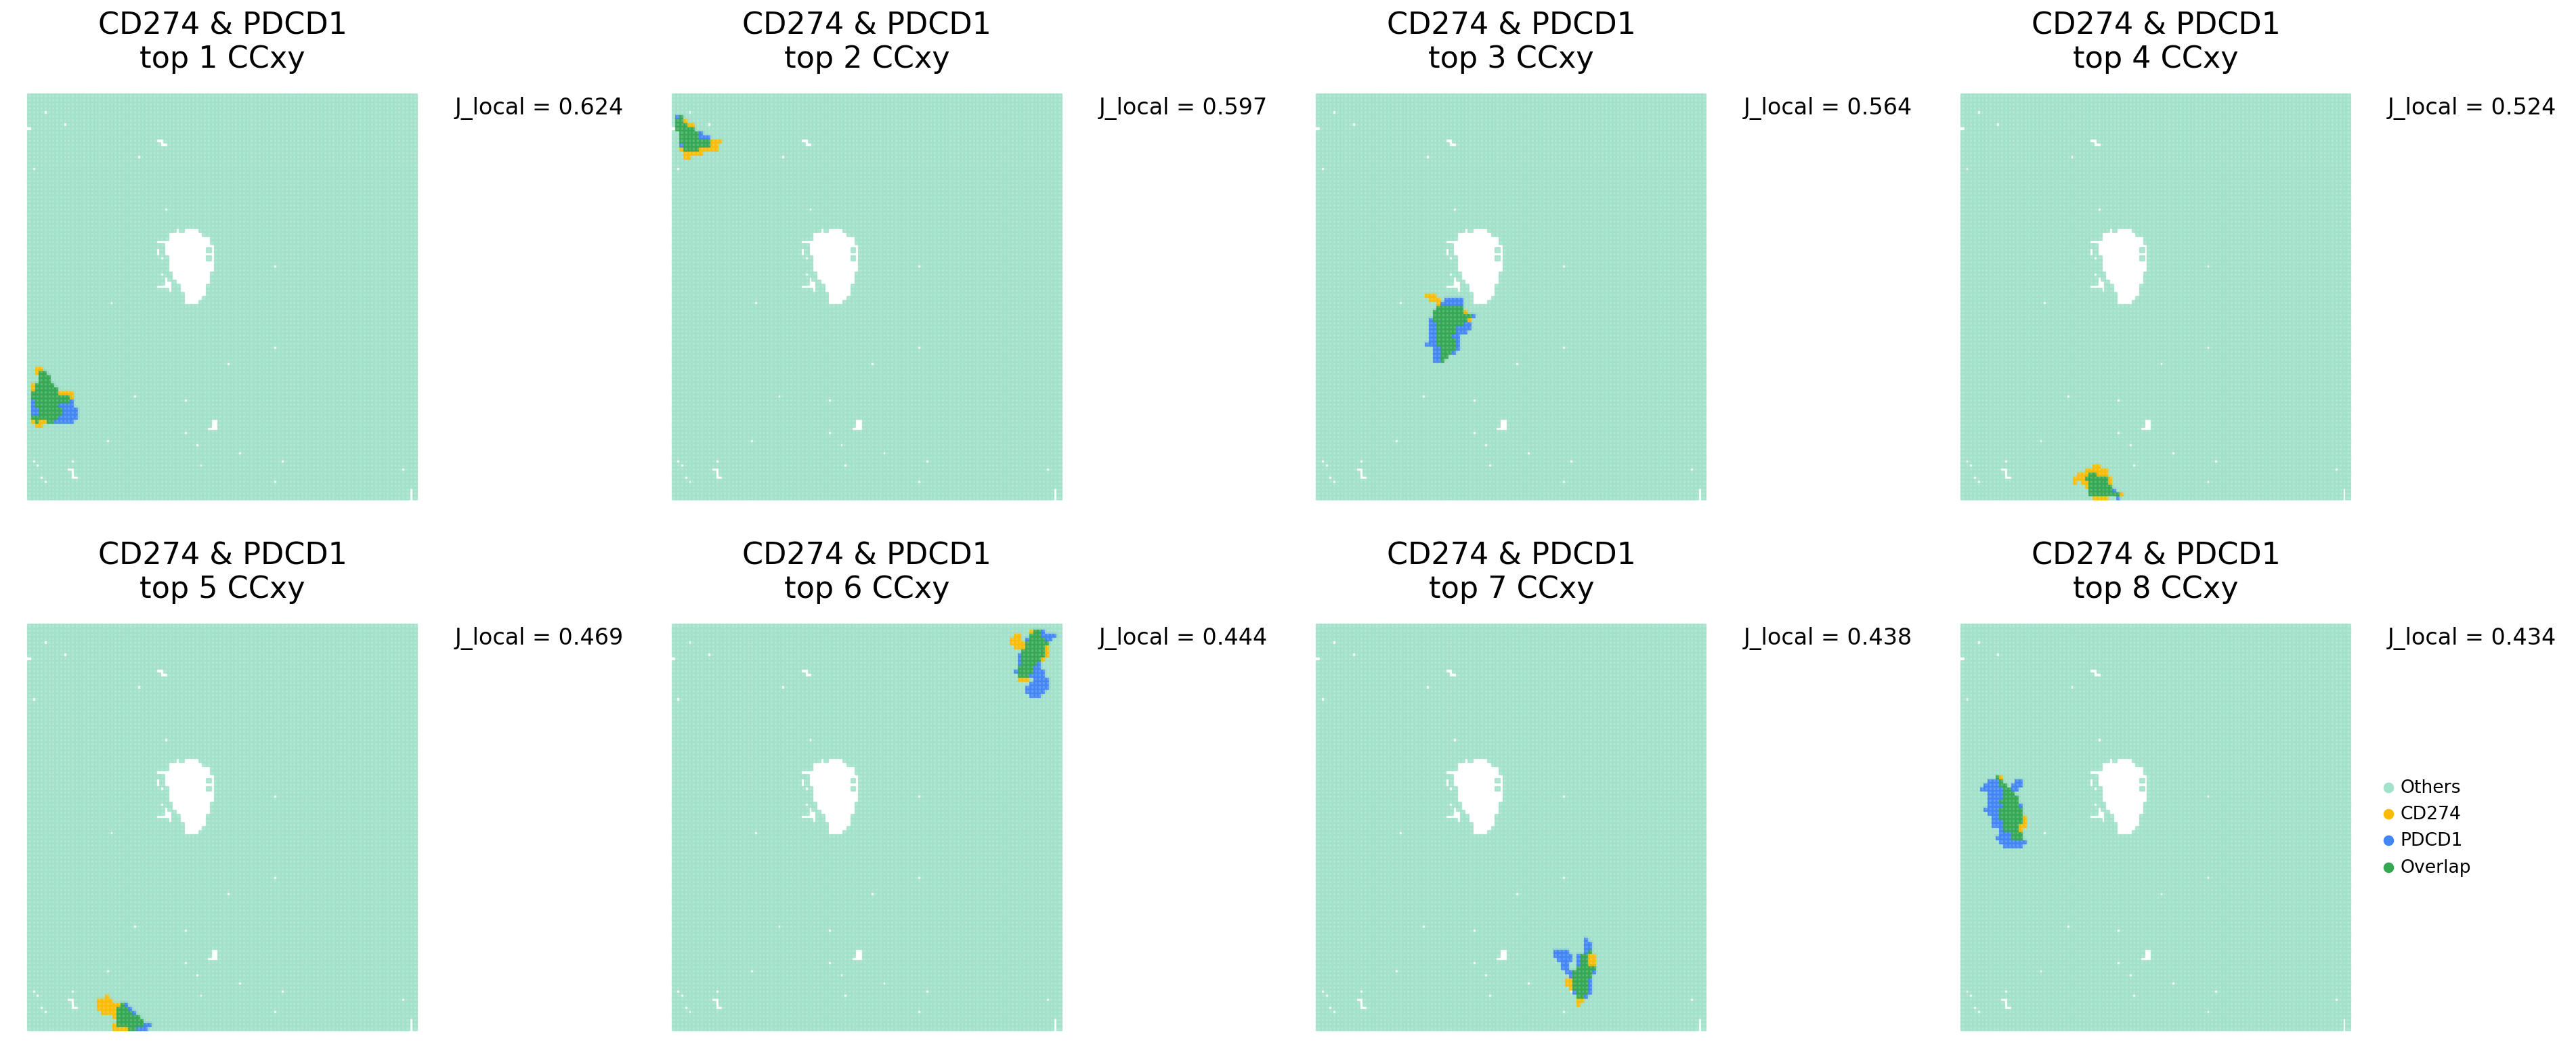

In [36]:
sp_adata.vis_jaccard_top_n_pair(feat_name_x='CD274', feat_name_y='PDCD1',
                                top_n = 8, ncol = 4, alpha = 0.8, dot_size=3,
                                fig_size = (6,5), title_fontsize = 20, legend_fontsize = 12,
                                title = '', return_axis=False, save=True, dpi=200)

#### 3. Estimate cell-type specific L-R interaction

##### Load saved STopover object for cell-type specific analysis

In [6]:
sp_adata = STopover_imageST(sp_load_path=os.path.join(save_dir, 'sp_grid_celltype_interact_adata.h5ad'), 
                            x_bins=100, y_bins=100, min_size=20, fwhm=2.5, thres_per=30, save_path=save_dir)

Anndata object is not provided: searching for the .h5ad file in 'sp_load_path'


##### Caculate cell-type specific expession

In [7]:
sp_adata_ts2, sp_adata_cd8 = sp_adata.celltype_specific_adata(cell_types=['tS2','Cytotoxic CD8+ T'])

In [8]:
sp_adata_ts2, sp_adata_cd8

(STopover_imageST object with n_obs × n_vars = 9762 × 960
     obs: 'array_col', 'array_row'
     uns: 'x_bins', 'y_bins', 'ST_type', 'grid_method', 'sc_celltype_colname', 'transcript_colname', 'sc_norm_total', 'min_counts', 'min_cells', 'min_size', 'fwhm', 'thres_per', 'obs_raw',
 STopover_imageST object with n_obs × n_vars = 9762 × 957
     obs: 'array_col', 'array_row'
     uns: 'x_bins', 'y_bins', 'ST_type', 'grid_method', 'sc_celltype_colname', 'transcript_colname', 'sc_norm_total', 'min_counts', 'min_cells', 'min_size', 'fwhm', 'thres_per', 'obs_raw')

##### Extract cell type-specific L-R colocalization patterns

In [9]:
sp_adata_ts2_cd8 = sp_adata.topological_similarity_celltype_pair(celltype_x='tS2', celltype_y='Cytotoxic CD8+ T',
                                                                 use_lr_db=True, lr_db_species='human', jaccard_type='default', J_result_name='result')

Calculating topological similarity between genes in 'tS2' and 'Cytotoxic CD8+ T'
Using CellTalk ligand-receptor dataset
End of data preparation
Elapsed time: 0.16 seconds 
Calculation of adjacency matrix and mask


  0%|          | 0/1 [00:00<?, ?it/s]

Calculation of connected components for each feature


  0%|          | 0/440 [00:00<?, ?it/s]

Calculation of composite jaccard indexes between feature pairs


  0%|          | 0/727 [00:00<?, ?it/s]

End of the whole process: 104.66 seconds


##### Save STopover object to the save_dir

In [10]:
sp_adata_ts2_cd8.save_connected_loc_data(save_format='h5ad', filename = 'cc_loc_smi_lr')

##### Load J_comp list for all cell-type specific LR pairs

In [11]:
sp_adata_ts2_cd8.uns.keys()

odict_keys(['x_bins', 'y_bins', 'ST_type', 'grid_method', 'sc_celltype_colname', 'transcript_colname', 'sc_norm_total', 'min_counts', 'min_cells', 'min_size', 'fwhm', 'thres_per', 'J_result_1'])

In [12]:
J_result = sp_adata_ts2_cd8.uns['J_result_1']
J_result.sort_values(by=['J_comp'], ascending=False)

,group,Feat_1,Feat_2,Avg_1,Avg_2,J_comp
720,0,tS2: FGF12,Cytotoxic CD8+ T: FGFR1,0.236661,0.007995,0.051282
176,0,tS2: FGF2,Cytotoxic CD8+ T: FGFR1,0.371089,0.007995,0.050562
269,0,tS2: IL15,Cytotoxic CD8+ T: IL2RG,0.310609,0.050093,0.050253
30,0,tS2: MMP2,Cytotoxic CD8+ T: FGFR1,0.349851,0.007995,0.044906
144,0,tS2: JAG1,Cytotoxic CD8+ T: NOTCH1,1.533989,0.003851,0.044432
...,...,...,...,...,...,...
266,0,tS2: PF4,Cytotoxic CD8+ T: LDLR,0.340151,0.014699,0.000000
271,0,tS2: CSF2,Cytotoxic CD8+ T: CSF2RB,0.257694,0.006513,0.000000
609,0,tS2: COL4A5,Cytotoxic CD8+ T: ITGA2,0.244987,0.007656,0.000000
610,0,tS2: COL6A1,Cytotoxic CD8+ T: ITGA2,1.193284,0.007656,0.000000


##### Visualize cell type-specific feature map

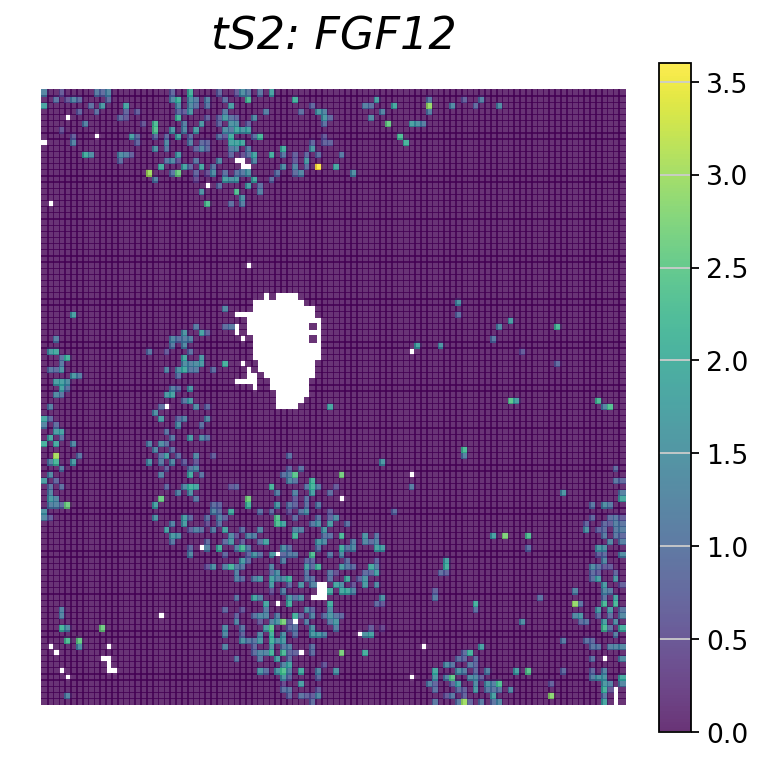

In [13]:
sp_adata_ts2.vis_spatial_imageST(feat_name='FGF12', title = 'tS2: ', fig_size=(5,5), title_fontsize=20, 
                                 legend_fontsize=12, save=True, return_axis=False, dpi=200)

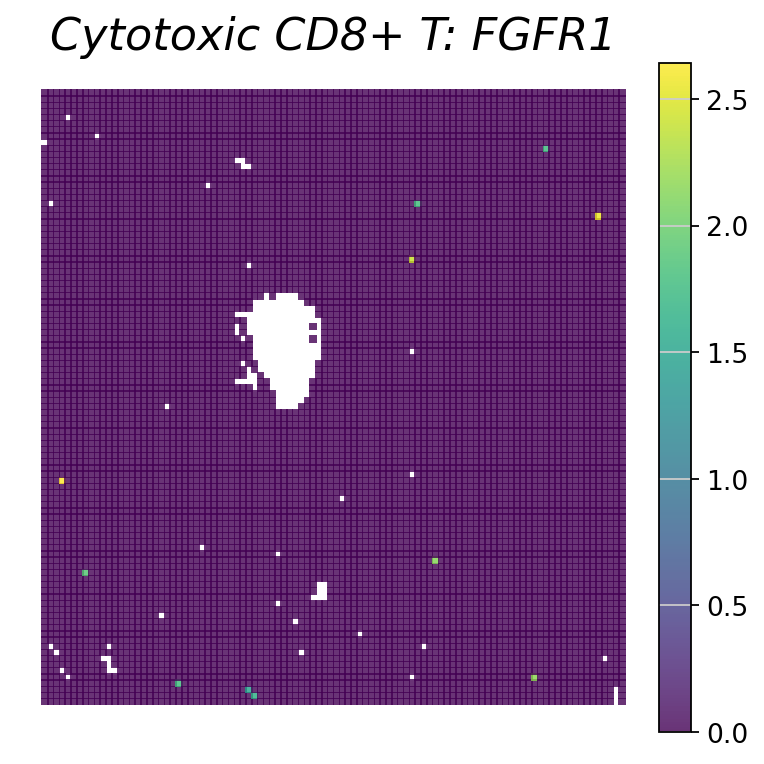

In [14]:
sp_adata_cd8.vis_spatial_imageST(feat_name='FGFR1', title = 'Cytotoxic CD8+ T: ', fig_size=(5,5), title_fontsize=20, 
                                 legend_fontsize=12, save=True, return_axis=False, dpi=200)

##### Visualize colocalized regions of a cell type-specific LR

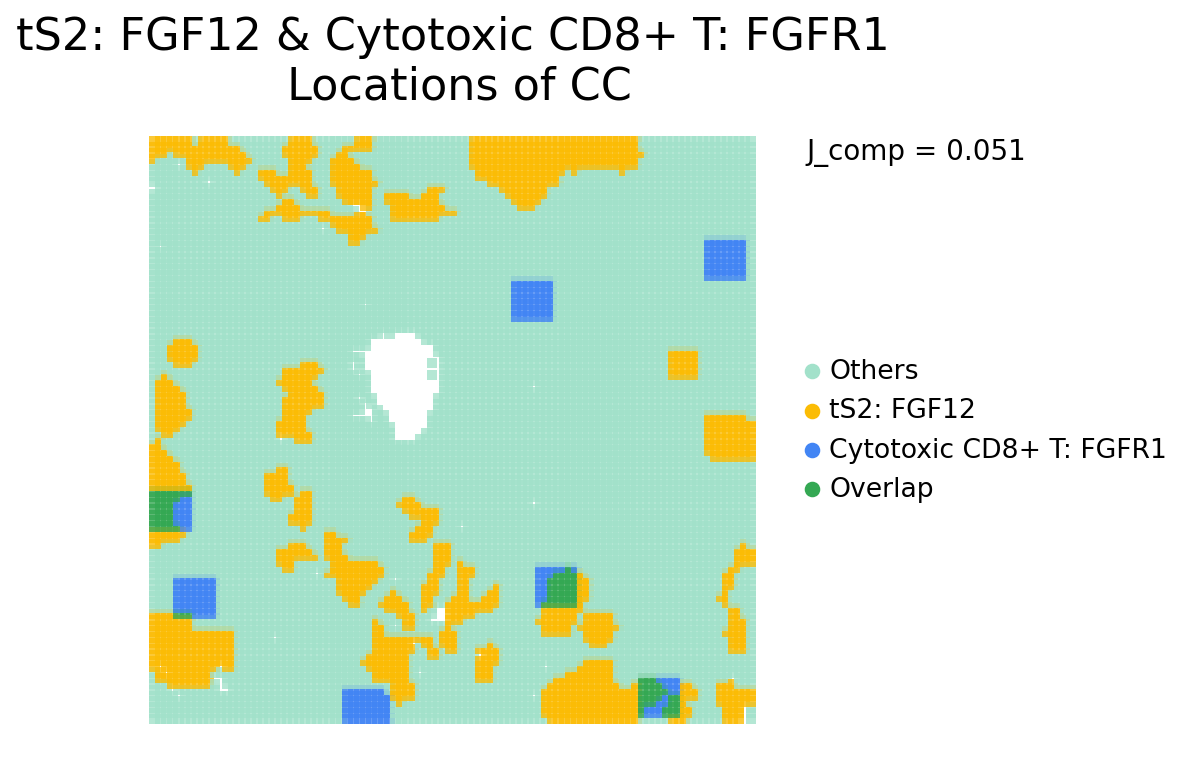

In [15]:
sp_adata_ts2_cd8.vis_all_connected(feat_name_x='tS2: FGF12', feat_name_y='Cytotoxic CD8+ T: FGFR1',
                                   alpha = 0.8, 
                                   fig_size=(7,5), title_fontsize = 20, legend_fontsize = 12, 
                                   title = '\n Locations of CC', return_axis=False, save=True)

##### Visualize top 4 regions with high local overlap

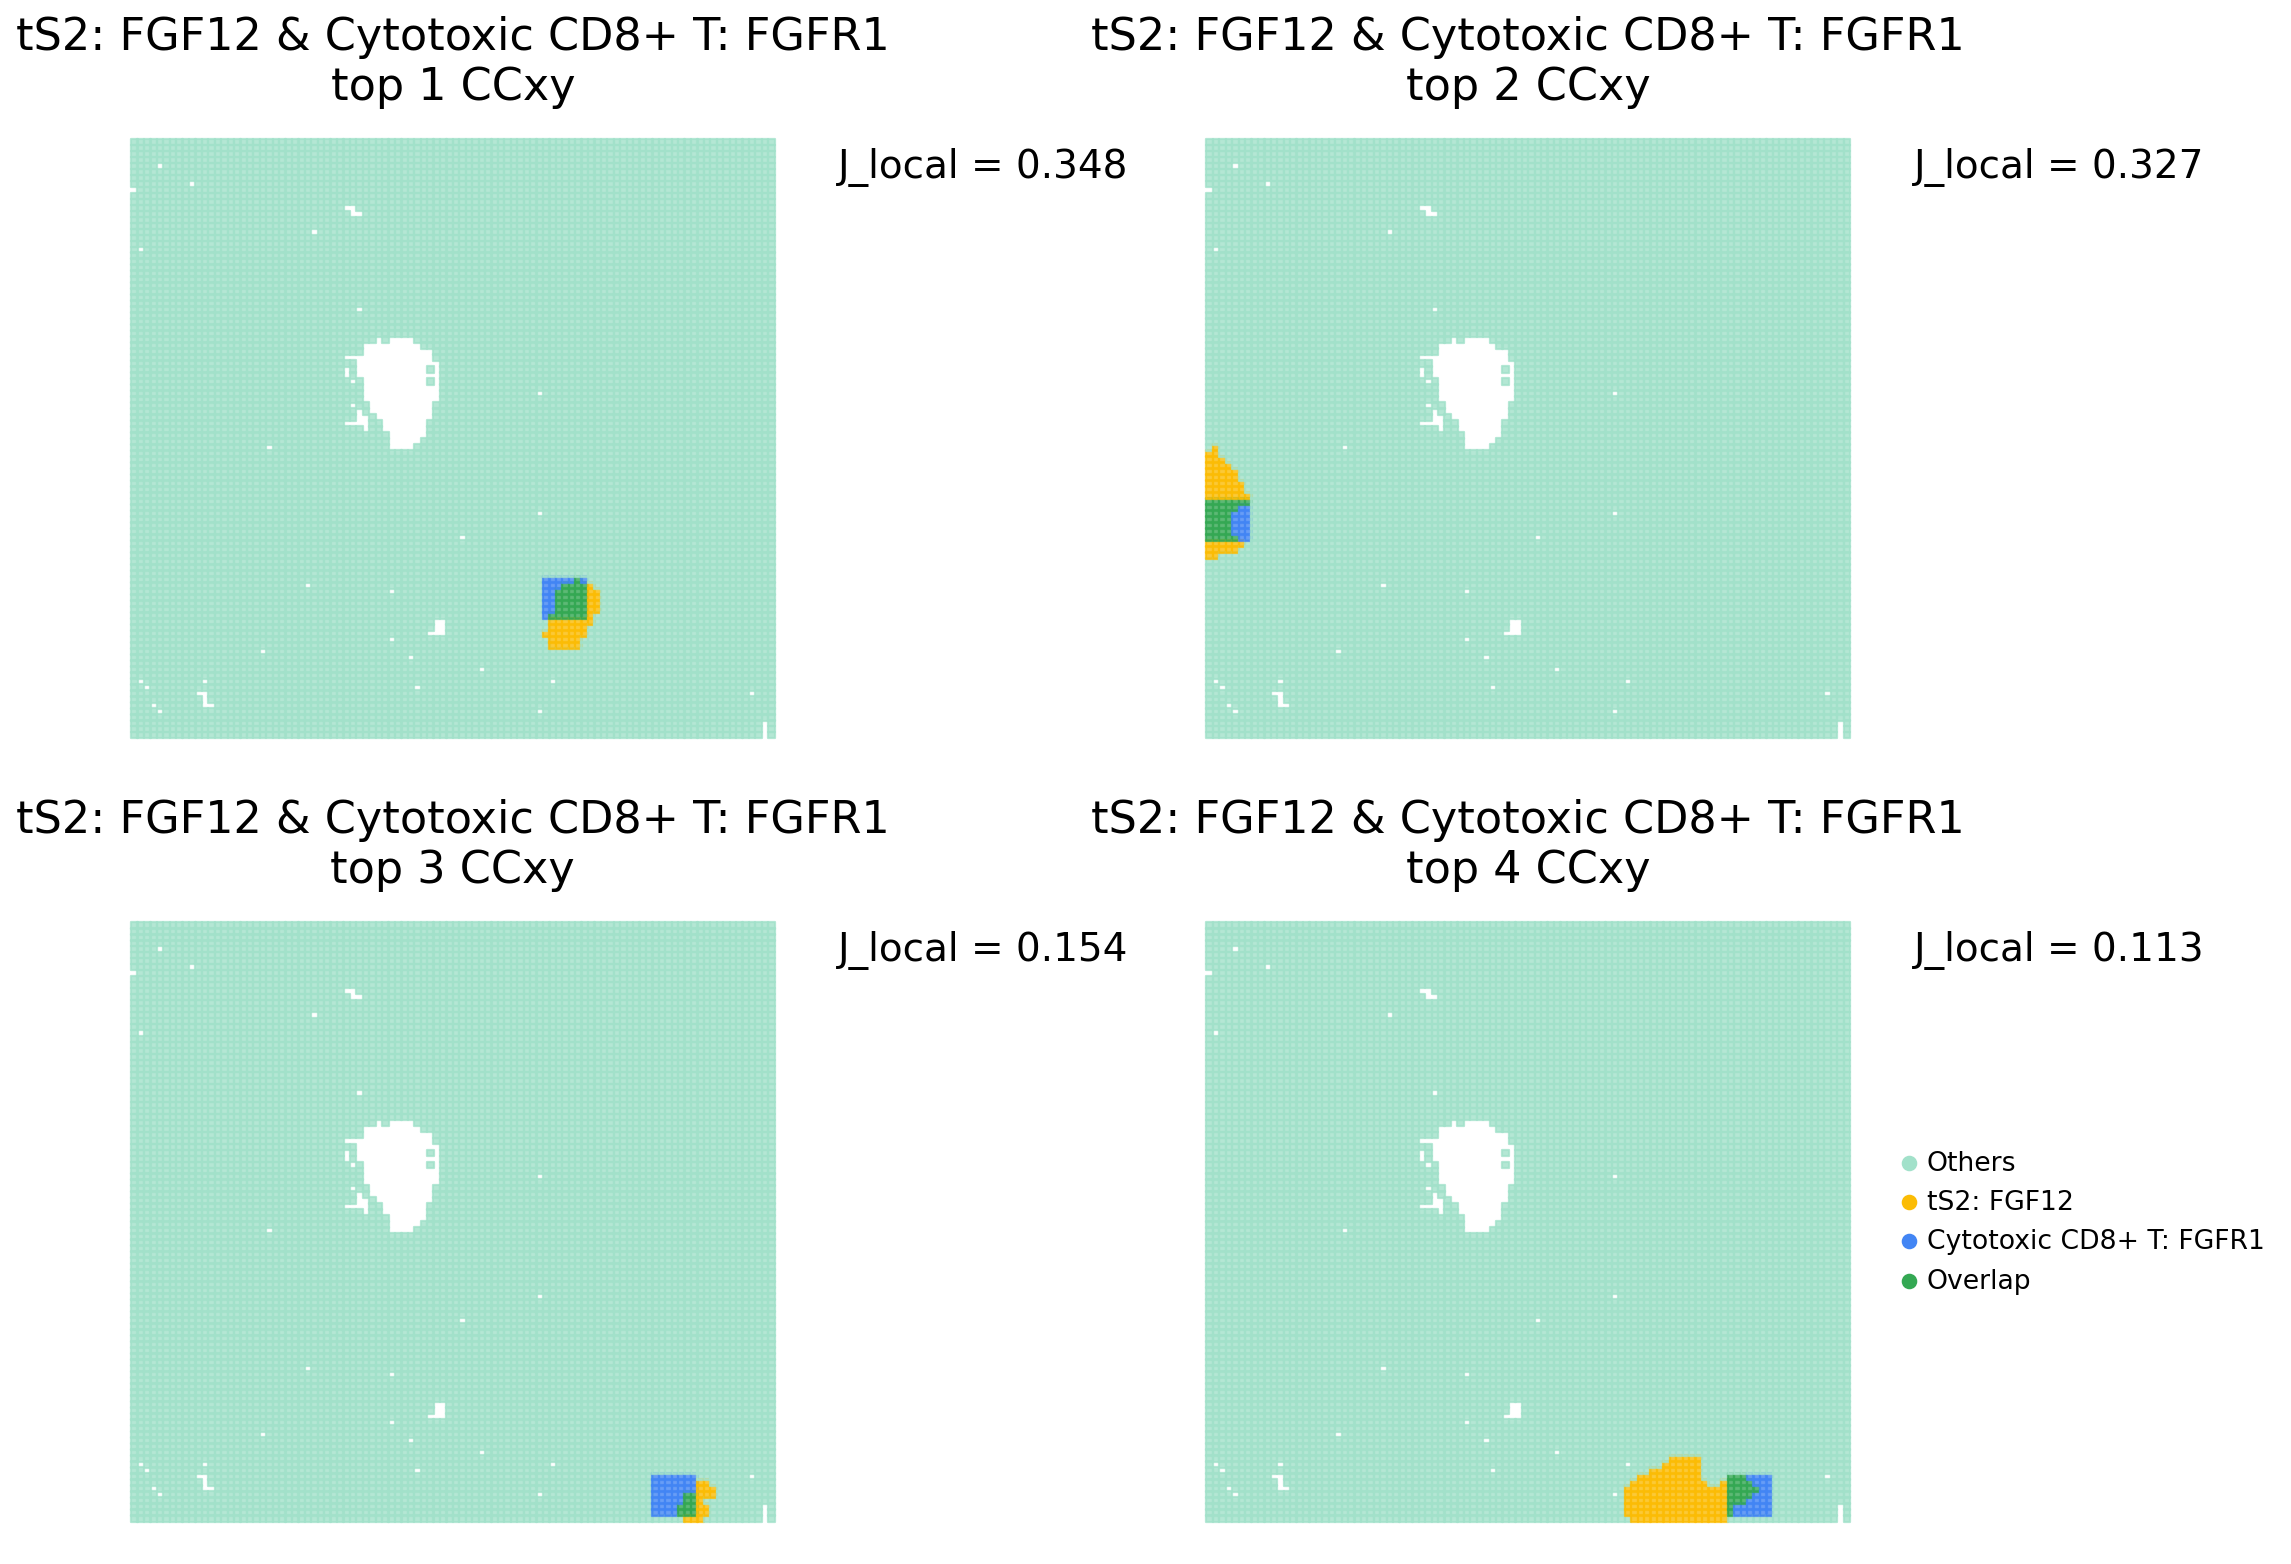

In [16]:
sp_adata_ts2_cd8.vis_jaccard_top_n_pair(feat_name_x='tS2: FGF12', feat_name_y='Cytotoxic CD8+ T: FGFR1',
                                        top_n = 4, ncol = 2, alpha = 0.8, dot_size=3,
                                        fig_size = (7,5), title_fontsize = 20, legend_fontsize = 12,
                                        title = '', return_axis=False, save=True, dpi=200)

##### Run permutation test

In [17]:
help(STopover_imageST.run_significance_test)

Help on function run_significance_test in module STopover.STopover_class:

run_significance_test(self, feat_pairs_sig_test=None, nperm=1000, seed=0, jaccard_type='default', num_workers=64, progress_bar=True)
    ## Perform a significant test using a permutation test and calculate p-values
    * feat_pairs_sig_test: feature pairs for the significance test (default: None -> Test all saved in .uns)
    * nperm: number of the random permutation (default: 1000)
    * seed: the seed for the random number generator (default: 0)
    * jaccard_type: type of the jaccard index output ('default': jaccard index or 'weighted': weighted jaccard index)
    * num_workers: number of workers to use for multiprocessing
    * progress_bar: whether to show the progress bar during multiprocessing



In [22]:
df_mod = sp_adata_ts2_cd8.uns['J_result_1']

In [25]:
df_mod.sort_values(by='J_comp', ascending=False)

,group,Feat_1,Feat_2,Avg_1,Avg_2,J_comp
720,0,tS2: FGF12,Cytotoxic CD8+ T: FGFR1,0.236661,0.007995,0.051282
176,0,tS2: FGF2,Cytotoxic CD8+ T: FGFR1,0.371089,0.007995,0.050562
269,0,tS2: IL15,Cytotoxic CD8+ T: IL2RG,0.310609,0.050093,0.050253
30,0,tS2: MMP2,Cytotoxic CD8+ T: FGFR1,0.349851,0.007995,0.044906
144,0,tS2: JAG1,Cytotoxic CD8+ T: NOTCH1,1.533989,0.003851,0.044432
...,...,...,...,...,...,...
266,0,tS2: PF4,Cytotoxic CD8+ T: LDLR,0.340151,0.014699,0.000000
271,0,tS2: CSF2,Cytotoxic CD8+ T: CSF2RB,0.257694,0.006513,0.000000
609,0,tS2: COL4A5,Cytotoxic CD8+ T: ITGA2,0.244987,0.007656,0.000000
610,0,tS2: COL6A1,Cytotoxic CD8+ T: ITGA2,1.193284,0.007656,0.000000


In [26]:
df_sub = df_mod[((df_mod['Feat_1']=='tS2: FGF12') & (df_mod['Feat_2'] == 'Cytotoxic CD8+ T: FGFR1')) | \
                ((df_mod['Feat_1']=='tS2: FGF2') & (df_mod['Feat_2'] == 'Cytotoxic CD8+ T: FGFR1'))].reset_index(drop=True)
df_sub

,group,Feat_1,Feat_2,Avg_1,Avg_2,J_comp
0,0,tS2: FGF2,Cytotoxic CD8+ T: FGFR1,0.371089,0.007995,0.050562
1,0,tS2: FGF12,Cytotoxic CD8+ T: FGFR1,0.236661,0.007995,0.051282


In [ ]:
sp_adata_ts2_cd8.run_significance_test(feat_pairs_sig_test = df_sub.loc[:,['Feat_1','Feat_2']],
                                       nperm=1000, seed=1234, jaccard_type='default', progress_bar=True)

##### Show significance of colocalization

In [ ]:
df_perm = sp_adata_ts2_cd8.uns['J_result_1_sig']
df_perm

##### Save STopover object
###### Cell annotation data in sp_adata.uns['adata_cell'] is saved separately

In [ ]:
sp_adata_ts2_cd8.save_connected_loc_data(save_format='h5ad', filename = 'sp_grid_celltype_specific_LR')